##Apache Spark with Google Colab


Setting up  Spark 2.4.7 with all dependencies on google colab. 

* Installing Java in the Google Colaboratory
* Setting up Spark 2.4.7  in the Google Colaboratory
* A test example




# Setting up Spark 2.4.7 the Google Colaboratory

This notebook comprises the instructions to run pyspark on google Colab. 

We will install the following OS tools 

* Java 8
* spark-2.4.7
* Hadoop2.7
* [Findspark](https://github.com/minrk/findspark)


> Make sure the spark-version you are downloading is availbale on target link



In [1]:
import time

Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")



It took 30.047858476638794 seconds to install all dependencies for spark to run on Google Colab. 



In [2]:
# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

## Spark Installation test
Lets test the installation of spark in our google colab environment. 

In [3]:
import findspark
import numpy as np
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
# Test the spark 
NameList = ['Ahmad', 'Salem', 'Noor', 'Heba']

NumberOfSamples=int(1000)

df = spark.createDataFrame([{"Column1": np.random.randint(1,100), 
                             "Column2":np.random.randint(24,35), 
                             "Column3":np.random.random(),
                             "Name":str(np.random.choice(NameList,p=[.5,.2,.1,.2])),
                             }
                              for i in range(NumberOfSamples)])

df.show(3, False)

#spark.stop()

/content/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-------+-------+------------------+-----+
|Column1|Column2|Column3           |Name |
+-------+-------+------------------+-----+
|59     |31     |0.3736162801327363|Heba |
|75     |28     |0.6738893595145822|Ahmad|
|60     |32     |0.8902618906934348|Ahmad|
+-------+-------+------------------+-----+
only showing top 3 rows



##Actions

####PrintSchem Prints out the schema in the tree format.	

In [4]:
df.printSchema()

root
 |-- Column1: long (nullable = true)
 |-- Column2: long (nullable = true)
 |-- Column3: double (nullable = true)
 |-- Name: string (nullable = true)



####collect: Returns all the records as a list of rows..	

In [5]:
df.collect() # Very heavy and will consume the RAM

[Row(Column1=59, Column2=31, Column3=0.3736162801327363, Name='Heba'),
 Row(Column1=75, Column2=28, Column3=0.6738893595145822, Name='Ahmad'),
 Row(Column1=60, Column2=32, Column3=0.8902618906934348, Name='Ahmad'),
 Row(Column1=59, Column2=27, Column3=0.46576177438844135, Name='Salem'),
 Row(Column1=72, Column2=33, Column3=0.366988985365314, Name='Salem'),
 Row(Column1=30, Column2=25, Column3=0.8782213069230462, Name='Heba'),
 Row(Column1=31, Column2=31, Column3=0.569279252419162, Name='Heba'),
 Row(Column1=80, Column2=27, Column3=0.6620355108525771, Name='Ahmad'),
 Row(Column1=66, Column2=33, Column3=0.10639853662690446, Name='Ahmad'),
 Row(Column1=32, Column2=33, Column3=0.4802386999319148, Name='Salem'),
 Row(Column1=1, Column2=30, Column3=0.2152023280130233, Name='Ahmad'),
 Row(Column1=5, Column2=28, Column3=0.06874033954386938, Name='Ahmad'),
 Row(Column1=27, Column2=28, Column3=0.6320790053248823, Name='Noor'),
 Row(Column1=40, Column2=24, Column3=0.6282966381785714, Name='Salem'

####show: Prints the first n rows to the console.	

In [6]:
df.show(3,vertical=True)

-RECORD 0---------------------
 Column1 | 59                 
 Column2 | 31                 
 Column3 | 0.3736162801327363 
 Name    | Heba               
-RECORD 1---------------------
 Column1 | 75                 
 Column2 | 28                 
 Column3 | 0.6738893595145822 
 Name    | Ahmad              
-RECORD 2---------------------
 Column1 | 60                 
 Column2 | 32                 
 Column3 | 0.8902618906934348 
 Name    | Ahmad              
only showing top 3 rows



####take: Returns the first ``num`` rows as a :class:`list` of :class:`Row`.

In [7]:
df.take(10)


[Row(Column1=59, Column2=31, Column3=0.3736162801327363, Name='Heba'),
 Row(Column1=75, Column2=28, Column3=0.6738893595145822, Name='Ahmad'),
 Row(Column1=60, Column2=32, Column3=0.8902618906934348, Name='Ahmad'),
 Row(Column1=59, Column2=27, Column3=0.46576177438844135, Name='Salem'),
 Row(Column1=72, Column2=33, Column3=0.366988985365314, Name='Salem'),
 Row(Column1=30, Column2=25, Column3=0.8782213069230462, Name='Heba'),
 Row(Column1=31, Column2=31, Column3=0.569279252419162, Name='Heba'),
 Row(Column1=80, Column2=27, Column3=0.6620355108525771, Name='Ahmad'),
 Row(Column1=66, Column2=33, Column3=0.10639853662690446, Name='Ahmad'),
 Row(Column1=32, Column2=33, Column3=0.4802386999319148, Name='Salem')]

In [8]:
df1 = spark.createDataFrame(df.take(10))
df1.show(20)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|     59|     31| 0.3736162801327363| Heba|
|     75|     28| 0.6738893595145822|Ahmad|
|     60|     32| 0.8902618906934348|Ahmad|
|     59|     27|0.46576177438844135|Salem|
|     72|     33|  0.366988985365314|Salem|
|     30|     25| 0.8782213069230462| Heba|
|     31|     31|  0.569279252419162| Heba|
|     80|     27| 0.6620355108525771|Ahmad|
|     66|     33|0.10639853662690446|Ahmad|
|     32|     33| 0.4802386999319148|Salem|
+-------+-------+-------------------+-----+



####head: Returns the first ``n`` rows.

In [9]:
df.head(10)


[Row(Column1=59, Column2=31, Column3=0.3736162801327363, Name='Heba'),
 Row(Column1=75, Column2=28, Column3=0.6738893595145822, Name='Ahmad'),
 Row(Column1=60, Column2=32, Column3=0.8902618906934348, Name='Ahmad'),
 Row(Column1=59, Column2=27, Column3=0.46576177438844135, Name='Salem'),
 Row(Column1=72, Column2=33, Column3=0.366988985365314, Name='Salem'),
 Row(Column1=30, Column2=25, Column3=0.8782213069230462, Name='Heba'),
 Row(Column1=31, Column2=31, Column3=0.569279252419162, Name='Heba'),
 Row(Column1=80, Column2=27, Column3=0.6620355108525771, Name='Ahmad'),
 Row(Column1=66, Column2=33, Column3=0.10639853662690446, Name='Ahmad'),
 Row(Column1=32, Column2=33, Column3=0.4802386999319148, Name='Salem')]

In [10]:
df2 = spark.createDataFrame(df.head(10))
df2.show(100)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|     59|     31| 0.3736162801327363| Heba|
|     75|     28| 0.6738893595145822|Ahmad|
|     60|     32| 0.8902618906934348|Ahmad|
|     59|     27|0.46576177438844135|Salem|
|     72|     33|  0.366988985365314|Salem|
|     30|     25| 0.8782213069230462| Heba|
|     31|     31|  0.569279252419162| Heba|
|     80|     27| 0.6620355108525771|Ahmad|
|     66|     33|0.10639853662690446|Ahmad|
|     32|     33| 0.4802386999319148|Salem|
+-------+-------+-------------------+-----+



####count: Returns the number of rows in this :class:`DataFrame`.

In [11]:
df.count()

1000

####first: Returns the first row as a :class:`Row`.

In [12]:
df.first

<bound method DataFrame.first of DataFrame[Column1: bigint, Column2: bigint, Column3: double, Name: string]>

In [13]:
df.first()

Row(Column1=59, Column2=31, Column3=0.3736162801327363, Name='Heba')

####toPandas: Returns the contents of this :class:`DataFrame` as Pandas ``pandas.DataFrame``.

In [14]:
DF=df.toPandas()

In [15]:
DF.head()

,Column1,Column2,Column3,Name
0,59,31,0.373616,Heba
1,75,28,0.673889,Ahmad
2,60,32,0.890262,Ahmad
3,59,27,0.465762,Salem
4,72,33,0.366989,Salem


In [16]:
DF.tail()

,Column1,Column2,Column3,Name
995,71,30,0.274869,Heba
996,37,32,0.403495,Ahmad
997,15,28,0.161884,Ahmad
998,56,33,0.556101,Ahmad
999,19,31,0.966544,Heba


In [17]:
DF.describe()

,Column1,Column2,Column3
count,1000.000000,1000.000000,1000.000000
mean,48.835000,28.926000,0.505739
std,28.580038,3.116767,0.289358
min,1.000000,24.000000,0.000775
25%,24.000000,26.000000,0.268140
50%,48.000000,29.000000,0.505729
75%,73.250000,32.000000,0.757970
max,99.000000,34.000000,0.999327


In [18]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  1000 non-null   int64  
 1   Column2  1000 non-null   int64  
 2   Column3  1000 non-null   float64
 3   Name     1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [19]:
DF['Column5']=DF['Column2'].apply(lambda x : (x/10)-2)
DF.head(3)

,Column1,Column2,Column3,Name,Column5
0,59,31,0.373616,Heba,1.1
1,75,28,0.673889,Ahmad,0.8
2,60,32,0.890262,Ahmad,1.2


In [20]:
def transFunc(x):
  y=x**2/10
  return y 

DF['Column6']=DF['Column2'].apply(transFunc)
DF.head(3)

,Column1,Column2,Column3,Name,Column5,Column6
0,59,31,0.373616,Heba,1.1,96.1
1,75,28,0.673889,Ahmad,0.8,78.4
2,60,32,0.890262,Ahmad,1.2,102.4


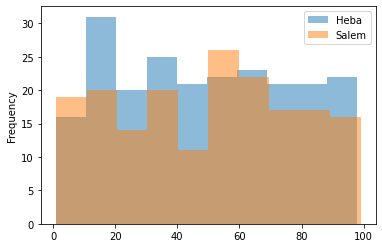

In [21]:
import matplotlib.pyplot as plt 

ax = DF[DF.Name=='Heba']['Column1'].plot.hist(bins=10, alpha=0.5)
ax = DF[DF.Name=='Salem']['Column1'].plot.hist(bins=10, alpha=0.5)
plt.legend(['Heba','Salem'])

####write: Returns the contents of this :class:`DataFrame` as Pandas ``pandas.DataFrame``.

In [22]:
df.write?

In [23]:
df.write.save?

In [24]:
df.write.save(path='MyProcessed', format='csv')

In [25]:
!ls -lh MyProcessed

total 32K
-rw-r--r-- 1 root root 16K Dec  1 16:06 part-00000-a54eee8f-3b13-4f3a-8be6-79d3fd0edf37-c000.csv
-rw-r--r-- 1 root root 16K Dec  1 16:06 part-00001-a54eee8f-3b13-4f3a-8be6-79d3fd0edf37-c000.csv
-rw-r--r-- 1 root root   0 Dec  1 16:06 _SUCCESS


In [28]:
!head -n 10 MyProcessed/content/MyProcessed/part-00000-a54eee8f-3b13-4f3a-8be6-79d3fd0edf37-c000.csv

head: cannot open 'MyProcessed/content/MyProcessed/part-00000-a54eee8f-3b13-4f3a-8be6-79d3fd0edf37-c000.csv' for reading: No such file or directory


In [ ]:
!head -n 10 MyProcessed/part-00001-39599817-195f-483d-9239-a3d241332dca-c000.csv

One important parameter is the number of partitions to cut the dataset into. Typically you want 2-4 partitions for each CPU in your cluster. Normally, Spark tries to set the number of partitions automatically based on your cluster. However, you can also set it manually. Lets do that 

In [29]:
df.rdd.getNumPartitions()

2

In [30]:
df.coalesce?

In [31]:
df.write.mode?

In [32]:
df2 = df.coalesce(1)

In [33]:
df2.rdd.getNumPartitions()

1

In [34]:
df.write.mode("overwrite").csv("MyProcessed", header=True)

In [35]:
!ls MyProcessed

part-00000-3f0efac1-e35e-45e6-b6cf-4bf85a073e70-c000.csv  _SUCCESS
part-00001-3f0efac1-e35e-45e6-b6cf-4bf85a073e70-c000.csv


In [36]:
df2.write.mode("overwrite").csv("MyProcessed", header=True)

In [37]:
!ls MyProcessed

part-00000-c0ea6db1-ab2d-4d20-8bc0-43c5d1bc45e3-c000.csv  _SUCCESS


##Properties

####columns: Returns the number of rows in this DataFrame

In [39]:
df.columns?

In [40]:
df.columns

['Column1', 'Column2', 'Column3', 'Name']

####dtypes: eturns all column names and their data types as a list.

---



In [41]:
df.dtypes?

In [42]:
df.dtypes

[('Column1', 'bigint'),
 ('Column2', 'bigint'),
 ('Column3', 'double'),
 ('Name', 'string')]

####isLocal:  Returns ``True`` if the :func:`collect` and :func:`take` methods can be run locally without any Spark executors.

---



In [43]:
df.isLocal?

In [44]:
df.isLocal()

False

####*isStreaming*: Returns true if this :class:Dataset contains one or more sources that continuouslyreturn data as it arrives.
---



In [45]:
df.isStreaming?

In [46]:
df.isStreaming

False

####*na*: Returns a :class:DataFrameNaFunctions for handling missing values.
---



In [47]:
df.na?

In [48]:
df.na.drop?

In [49]:
df.na.fill?

In [50]:
df.na.replace?

In [51]:
df.na.drop().count()


1000

In [52]:
df2 = spark.createDataFrame([{"Column1": np.nan, 
                             "Column2":np.random.randint(24,35), 
                             "Column3":np.random.random(),
                             "Name":str(np.random.choice(NameList,p=[.5,.2,.1,.2])),
                             }
                              for i in range(NumberOfSamples)])

/content/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [53]:
df2.show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|    NaN|     24|0.43463458527774934| Noor|
|    NaN|     33|0.19127507847178815|Ahmad|
|    NaN|     34| 0.4761364495607032| Noor|
|    NaN|     25|0.25451227236901797|Ahmad|
|    NaN|     34| 0.1754860806431765| Heba|
|    NaN|     28|0.03699975112887943|Ahmad|
|    NaN|     34|0.16668556332117335|Ahmad|
|    NaN|     26|0.12620499841216082|Salem|
|    NaN|     24| 0.1749059663922925|Ahmad|
|    NaN|     30| 0.8383892598736717|Ahmad|
+-------+-------+-------------------+-----+
only showing top 10 rows



In [54]:
df2.na.drop().count()

0

In [55]:
df2.na.fill(1).show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|    1.0|     24|0.43463458527774934| Noor|
|    1.0|     33|0.19127507847178815|Ahmad|
|    1.0|     34| 0.4761364495607032| Noor|
|    1.0|     25|0.25451227236901797|Ahmad|
|    1.0|     34| 0.1754860806431765| Heba|
|    1.0|     28|0.03699975112887943|Ahmad|
|    1.0|     34|0.16668556332117335|Ahmad|
|    1.0|     26|0.12620499841216082|Salem|
|    1.0|     24| 0.1749059663922925|Ahmad|
|    1.0|     30| 0.8383892598736717|Ahmad|
+-------+-------+-------------------+-----+
only showing top 10 rows



In [56]:
df2.show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|    NaN|     24|0.43463458527774934| Noor|
|    NaN|     33|0.19127507847178815|Ahmad|
|    NaN|     34| 0.4761364495607032| Noor|
|    NaN|     25|0.25451227236901797|Ahmad|
|    NaN|     34| 0.1754860806431765| Heba|
|    NaN|     28|0.03699975112887943|Ahmad|
|    NaN|     34|0.16668556332117335|Ahmad|
|    NaN|     26|0.12620499841216082|Salem|
|    NaN|     24| 0.1749059663922925|Ahmad|
|    NaN|     30| 0.8383892598736717|Ahmad|
+-------+-------+-------------------+-----+
only showing top 10 rows



In [57]:
df2=df2.na.fill(10)
df2.show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|   10.0|     24|0.43463458527774934| Noor|
|   10.0|     33|0.19127507847178815|Ahmad|
|   10.0|     34| 0.4761364495607032| Noor|
|   10.0|     25|0.25451227236901797|Ahmad|
|   10.0|     34| 0.1754860806431765| Heba|
|   10.0|     28|0.03699975112887943|Ahmad|
|   10.0|     34|0.16668556332117335|Ahmad|
|   10.0|     26|0.12620499841216082|Salem|
|   10.0|     24| 0.1749059663922925|Ahmad|
|   10.0|     30| 0.8383892598736717|Ahmad|
+-------+-------+-------------------+-----+
only showing top 10 rows



####*describe*: Computes basic statistics for numeric and string columns.
---



In [58]:
df.describe?

In [62]:
df.describe().show()

+-------+------------------+-----------------+--------------------+-----+
|summary|           Column1|          Column2|             Column3| Name|
+-------+------------------+-----------------+--------------------+-----+
|  count|              1000|             1000|                1000| 1000|
|   mean|            48.835|           28.926|  0.5057385013902848| null|
| stddev|28.580038376349215|3.116767273672874|  0.2893575566944415| null|
|    min|                 1|               24|7.751747625006633E-4|Ahmad|
|    max|                99|               34|  0.9993267042904767|Salem|
+-------+------------------+-----------------+--------------------+-----+



In [63]:
df.describe(['Column1']).show()

+-------+------------------+
|summary|           Column1|
+-------+------------------+
|  count|              1000|
|   mean|            48.835|
| stddev|28.580038376349215|
|    min|                 1|
|    max|                99|
+-------+------------------+



####*distinct*: Returns a new :class:DataFrame containing the distinct rows in this :class:DataFrame.
---



In [64]:
df.distinct?

In [65]:
df.distinct().show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|     28|     31| 0.9601470574728143|Ahmad|
|     52|     24| 0.7958291065009987| Heba|
|     96|     29| 0.7401181702238403| Heba|
|     84|     29|0.27564281723938844|Ahmad|
|     20|     24|0.34207026999123114|Ahmad|
|      4|     25| 0.9581453499770243| Noor|
|     19|     32| 0.5838059952613988| Heba|
|     63|     25|0.47433202803592434|Ahmad|
|     49|     29|  0.281772949522476|Ahmad|
|     88|     34| 0.7908333579040555|Salem|
+-------+-------+-------------------+-----+
only showing top 10 rows



In [66]:
df.distinct().count()

1000

In [67]:
df.select('Name').distinct().show()

+-----+
| Name|
+-----+
|Ahmad|
|Salem|
| Heba|
| Noor|
+-----+



In [68]:
df.select('Name').distinct().count()

4

####*drop*: Returns a new :class:DataFrame that drops the specified column. This is a no-op if schema doesn't contain the given column name(s).
---



In [69]:
df.drop?

In [70]:
df.columns

['Column1', 'Column2', 'Column3', 'Name']

In [71]:
df.drop('Column1').show(3)

+-------+------------------+-----+
|Column2|           Column3| Name|
+-------+------------------+-----+
|     31|0.3736162801327363| Heba|
|     28|0.6738893595145822|Ahmad|
|     32|0.8902618906934348|Ahmad|
+-------+------------------+-----+
only showing top 3 rows



In [72]:
df.show(3)

+-------+-------+------------------+-----+
|Column1|Column2|           Column3| Name|
+-------+-------+------------------+-----+
|     59|     31|0.3736162801327363| Heba|
|     75|     28|0.6738893595145822|Ahmad|
|     60|     32|0.8902618906934348|Ahmad|
+-------+-------+------------------+-----+
only showing top 3 rows



In [73]:
df1=df.drop('Column1')
df1.show(3)

+-------+------------------+-----+
|Column2|           Column3| Name|
+-------+------------------+-----+
|     31|0.3736162801327363| Heba|
|     28|0.6738893595145822|Ahmad|
|     32|0.8902618906934348|Ahmad|
+-------+------------------+-----+
only showing top 3 rows



####*drop_duplicates* drop_duplicates is an alias for :func:dropDuplicates.
---



####*dropDuplicates*: Returns a new :class:DataFrame that drops the specified column. This is a no-op if schema doesn't contain the given column name(s).
---



In [74]:
df.dropDuplicates?

In [75]:
from pyspark.sql import Row
sparkContext=spark.sparkContext

df3 = sparkContext.parallelize([ 
                                Row(name='Alice', age=5, height=80), 
                                Row(name='Alice', age=5, height=80), 
                                Row(name='Alice', age=10, height=80)]).toDF()
df3.dropDuplicates().show(3)


+---+------+-----+
|age|height| name|
+---+------+-----+
|  5|    80|Alice|
| 10|    80|Alice|
+---+------+-----+



In [76]:
df3.dropDuplicates().count()

2

In [77]:
df.dropDuplicates().count()

1000

In [78]:
df.select("name").dropDuplicates().count()

4

####*dropna*: Returns a new :class:DataFrame that drops the specified column. This is a no-op if schema doesn't contain the given column name(s).
---



In [79]:
df.dropna?

In [80]:
from pyspark.sql import Row
sparkContext=spark.sparkContext

df4 = sparkContext.parallelize([ 
                                Row(name='Alice', age=9, height=80), 
                                Row(name='Frank', age=5, height=80), 
                                Row(name='Ahmad', age=10, height=np.nan)]).toDF()
df4.show(3)

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
| 10|  null|Ahmad|
+---+------+-----+



In [81]:
df4.dropna().show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
+---+------+-----+



####*fillna*: Replace null values, alias for na.fill()
---



In [82]:
df4.show(3)

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
| 10|  null|Ahmad|
+---+------+-----+



In [83]:
df4.fillna(3).show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
| 10|     3|Ahmad|
+---+------+-----+



In [84]:
fill_avg=df4.select('height').toPandas().mean()[0]
df4.fillna(fill_avg).show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
| 10|    80|Ahmad|
+---+------+-----+



####*filter*: Filters rows using the given condition.	
---



In [85]:
df4.filter?

In [86]:
df4.show(10)

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
|  5|    80|Frank|
| 10|  null|Ahmad|
+---+------+-----+



In [87]:
df4.filter(df4.age>5).show(3)

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
| 10|  null|Ahmad|
+---+------+-----+



In [88]:
df4.filter((df4.age>5)&(df4.name=='Alice')).show(3)

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
+---+------+-----+



In [89]:
Cond=(df4.age>5)&(df4.name=='Alice')

In [90]:
Cond

Column<b'((age > 5) AND (name = Alice))'>

In [91]:
df5=df4.filter(Cond)
df5.show()

+---+------+-----+
|age|height| name|
+---+------+-----+
|  9|    80|Alice|
+---+------+-----+



####*withColumn*: Returns a new :class:DataFrame by adding a column or replacing theexisting column that has the same name.
---



In [92]:
df4.withColumn?

In [93]:
df4 = df4.withColumn('age2', df4.age + 2)


In [94]:
df4.show(3)

+---+------+-----+----+
|age|height| name|age2|
+---+------+-----+----+
|  9|    80|Alice|  11|
|  5|    80|Frank|   7|
| 10|  null|Ahmad|  12|
+---+------+-----+----+



In [95]:
from pyspark.sql import functions as F

# Create a column by adding 2 columns together
df4 = df4.withColumn("age3",F.col('age')+ F.col('age2'))

# Create a column 'ratio' by dividing one by another one
df4 = df4.withColumn("age4",F.col('age')*100/ F.col('age3'))

df4.show()


+---+------+-----+----+----+------------------+
|age|height| name|age2|age3|              age4|
+---+------+-----+----+----+------------------+
|  9|    80|Alice|  11|  20|              45.0|
|  5|    80|Frank|   7|  12|41.666666666666664|
| 10|  null|Ahmad|  12|  22| 45.45454545454545|
+---+------+-----+----+----+------------------+



####*withColumnRenamed*: Returns a new :class:DataFrame by renaming an existing column. This is a no-op if schema doesn't contain the given column name.
---



In [96]:
df4.withColumnRenamed?

In [97]:
df4.withColumnRenamed('age','Orignal_age').show()

+-----------+------+-----+----+----+------------------+
|Orignal_age|height| name|age2|age3|              age4|
+-----------+------+-----+----+----+------------------+
|          9|    80|Alice|  11|  20|              45.0|
|          5|    80|Frank|   7|  12|41.666666666666664|
|         10|  null|Ahmad|  12|  22| 45.45454545454545|
+-----------+------+-----+----+----+------------------+



####*groupBy*: Groups the :class:DataFrame using the specified columns, so we can run aggregation on them.
---



In [98]:
df4.groupBy?

In [99]:

df.show(10)

+-------+-------+-------------------+-----+
|Column1|Column2|            Column3| Name|
+-------+-------+-------------------+-----+
|     59|     31| 0.3736162801327363| Heba|
|     75|     28| 0.6738893595145822|Ahmad|
|     60|     32| 0.8902618906934348|Ahmad|
|     59|     27|0.46576177438844135|Salem|
|     72|     33|  0.366988985365314|Salem|
|     30|     25| 0.8782213069230462| Heba|
|     31|     31|  0.569279252419162| Heba|
|     80|     27| 0.6620355108525771|Ahmad|
|     66|     33|0.10639853662690446|Ahmad|
|     32|     33| 0.4802386999319148|Salem|
+-------+-------+-------------------+-----+
only showing top 10 rows



In [100]:
df.groupBy('Name').avg().show()

+-----+------------------+------------------+-------------------+
| Name|      avg(Column1)|      avg(Column2)|       avg(Column3)|
+-----+------------------+------------------+-------------------+
|Ahmad|48.509164969450104|29.069246435845216| 0.5134887004971336|
|Salem| 49.39010989010989|28.945054945054945| 0.5091430853692043|
| Heba|49.207207207207205| 28.66216216216216| 0.4904096851223553|
| Noor| 48.60952380952381| 28.78095238095238|0.49600531249365637|
+-----+------------------+------------------+-------------------+



In [101]:
df.groupBy('Name').max().show()

+-----+------------+------------+------------------+
| Name|max(Column1)|max(Column2)|      max(Column3)|
+-----+------------+------------+------------------+
|Ahmad|          99|          34|0.9991036296931801|
|Salem|          99|          34|0.9993267042904767|
| Heba|          98|          34|0.9992195440304341|
| Noor|          99|          34|0.9914587214325291|
+-----+------------+------------+------------------+



In [102]:
df.groupBy('Name').count().show()

+-----+-----+
| Name|count|
+-----+-----+
|Ahmad|  491|
|Salem|  182|
| Heba|  222|
| Noor|  105|
+-----+-----+



In [103]:
df.groupBy('Name').count().collect()

[Row(Name='Ahmad', count=491),
 Row(Name='Salem', count=182),
 Row(Name='Heba', count=222),
 Row(Name='Noor', count=105)]

In [104]:
df.groupBy('Name').count().toPandas()

,Name,count
0,Ahmad,491
1,Salem,182
2,Heba,222
3,Noor,105


In [105]:
sorted(df.groupBy('Name').agg({'Column1': 'mean'}).collect())




[Row(Name='Ahmad', avg(Column1)=48.509164969450104),
 Row(Name='Heba', avg(Column1)=49.207207207207205),
 Row(Name='Noor', avg(Column1)=48.60952380952381),
 Row(Name='Salem', avg(Column1)=49.39010989010989)]

In [106]:
df.groupBy('Name').agg({'Column1': 'mean'}).toPandas()

,Name,avg(Column1)
0,Ahmad,48.509165
1,Salem,49.390110
2,Heba,49.207207
3,Noor,48.609524


In [107]:
df.groupBy('Name').agg({'Column1': 'count'}).toPandas()

,Name,count(Column1)
0,Ahmad,491
1,Salem,182
2,Heba,222
3,Noor,105


In [108]:
df.limit(100).groupBy('Name').agg({'Column1': 'count'}).toPandas()

,Name,count(Column1)
0,Heba,22
1,Ahmad,53
2,Salem,14
3,Noor,11


####*limit*: Limits the result count to the number specified.
---



In [109]:
df.limit?

In [110]:
df.limit(100).count()

100

In [111]:
#df.limit(100).select(['Name','Column1']).collect()
DF_100=df.limit(100).select(['Name','Column1']).toPandas()
DF_100.head(10)

,Name,Column1
0,Heba,59
1,Ahmad,75
2,Ahmad,60
3,Salem,59
4,Salem,72
5,Heba,30
6,Heba,31
7,Ahmad,80
8,Ahmad,66
9,Salem,32


In [112]:
len(DF_100)

100

####*sample*: Returns a sampled subset of this :class:DataFrame.
---



In [113]:
df.sample?

In [114]:
df = spark.range(100)

df.sample(fraction=0.5, seed=3).count()


49

In [115]:
df.sample(fraction=0.5, seed=3).show(10)


+---+
| id|
+---+
|  0|
|  2|
|  5|
|  8|
| 10|
| 11|
| 12|
| 14|
| 15|
| 16|
+---+
only showing top 10 rows



In [116]:
 df.sample(withReplacement=True, fraction=0.5, seed=3).show(10)

+---+
| id|
+---+
|  5|
|  6|
| 10|
| 13|
| 21|
| 27|
| 27|
| 27|
| 28|
| 31|
+---+
only showing top 10 rows



In [117]:

NumberOfSamples=int(10000)

df = spark.createDataFrame([{"Column1": np.random.randint(1,100), 
                             "Column2":np.random.randint(24,35), 
                             "Column3":np.random.random(),
                             "Name":str(np.random.choice(NameList,p=[.5,.2,.1,.2])),
                             }
                              for i in range(NumberOfSamples)])

/content/spark-2.4.7-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


In [118]:
df.count()

10000

In [119]:
df_sample=df.sample(withReplacement=False, fraction=0.5, seed=3)
df_sample.count()

4985

####*select*:Projects a set of expressions and returns a new :class:`DataFrame`
---



In [120]:
df.select('*').show(10)

+-------+-------+--------------------+-----+
|Column1|Column2|             Column3| Name|
+-------+-------+--------------------+-----+
|     77|     32|  0.9639776748618206| Noor|
|     31|     32|   0.779031406308421|Ahmad|
|     75|     24|  0.5146530811196018|Ahmad|
|     62|     33|  0.9639608380004595|Ahmad|
|     66|     25|  0.4798610873986202|Ahmad|
|     54|     29| 0.39399437545362026|Ahmad|
|     34|     24|  0.4252072118728347|Ahmad|
|     68|     24|0.012684810920411627|Salem|
|     76|     30| 0.26633328647166365|Ahmad|
|     22|     34|  0.7573962980100326|Ahmad|
+-------+-------+--------------------+-----+
only showing top 10 rows



In [121]:
df.select?

In [122]:
df.select('Name','Column2').filter(df.Column2>30).show(10)

+-----+-------+
| Name|Column2|
+-----+-------+
| Noor|     32|
|Ahmad|     32|
|Ahmad|     33|
|Ahmad|     34|
|Ahmad|     34|
| Heba|     34|
|Ahmad|     33|
|Ahmad|     32|
|Ahmad|     32|
| Heba|     33|
+-----+-------+
only showing top 10 rows



In [123]:
df.select('Name','Column2').filter(df.Column2>30).filter(df.Name=='Ahmad').show(10)

+-----+-------+
| Name|Column2|
+-----+-------+
|Ahmad|     32|
|Ahmad|     33|
|Ahmad|     34|
|Ahmad|     34|
|Ahmad|     33|
|Ahmad|     32|
|Ahmad|     32|
|Ahmad|     32|
|Ahmad|     34|
|Ahmad|     32|
+-----+-------+
only showing top 10 rows



In [124]:
DF_2=df.select('Name','Column2').filter(df.Column2>30).filter(df.Name=='Ahmad').toPandas()

In [125]:
DF_2.describe()

,Column2
count,1843.000000
mean,32.451438
std,1.108256
min,31.000000
25%,31.000000
50%,32.000000
75%,33.000000
max,34.000000


In [126]:
DF_2=df.sample(0.1).select('Name','Column2').filter(df.Column2>30).filter(df.Name=='Ahmad').toPandas()
DF_2.describe()

,Column2
count,185.000000
mean,32.508108
std,1.142646
min,31.000000
25%,32.000000
50%,32.000000
75%,34.000000
max,34.000000


In [127]:
df.sample(.1).select('Name','Column2').filter(df.Column2>30).filter(df.Name=='Ahmad').summary().show()

+-------+-----+-----------------+
|summary| Name|          Column2|
+-------+-----+-----------------+
|  count|  193|              193|
|   mean| null|32.53367875647668|
| stddev| null|1.065635295851782|
|    min|Ahmad|               31|
|    25%| null|               32|
|    50%| null|               33|
|    75%| null|               33|
|    max|Ahmad|               34|
+-------+-----+-----------------+



In [128]:
df.sample(.1).select('Name','Column2').filter(df.Column2>30).filter(df.Name=='Ahmad').summary().show()

+-------+-----+------------------+
|summary| Name|           Column2|
+-------+-----+------------------+
|  count|  196|               196|
|   mean| null|32.326530612244895|
| stddev| null|1.1073230386290167|
|    min|Ahmad|                31|
|    25%| null|                31|
|    50%| null|                32|
|    75%| null|                33|
|    max|Ahmad|                34|
+-------+-----+------------------+



In [129]:
###Next